***Import Dependencies***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn import metrics
from matplotlib import pyplot as plt
from matplotlib import *


In [2]:
#Font for graph labels, this is used for all graphs in this notebook
label_font = {"fontsize": 12, 
              "color" : "darkred",
             'weight': 'normal'}
#Font for graph title, this is used for all graphs in this notebook
title_font = {"fontsize": 15, 
              "color" : "darkred",
             'weight': 'normal'}

***Data Collection and Processing***

In [19]:
#loading the csv data to a panda DataFrame
agri_data=pd.read_csv('//Users/shreshikanayani/Desktop/sem_8/Agriculture2018.csv')

In [20]:
#print First 5 rows in the dataframe
agri_data.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Gujarat,Amreli,Damnagar,Bhindi(Ladies Finger),Bhindi,18/01/2021,1400,1600,1500
1,Gujarat,Amreli,Damnagar,Brinjal,Other,18/01/2021,1000,1200,1100
2,Gujarat,Amreli,Damnagar,Cabbage,Cabbage,18/01/2021,200,400,300
3,Gujarat,Amreli,Damnagar,Cauliflower,Cauliflower,18/01/2021,400,600,500
4,Gujarat,Amreli,Damnagar,Coriander(Leaves),Coriander,18/01/2021,300,500,400


In [21]:
#last five rows of the dataframe
agri_data.tail()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
214,West Bengal,Bankura,Khatra,Potato,Jyoti,18/01/2021,1180,1250,1200
215,West Bengal,Bankura,Khatra,Rice,Common,18/01/2021,2550,2650,2600
216,West Bengal,Bankura,Khatra,Sweet Pumpkin,Sweet Pumpkin,18/01/2021,900,1200,1000
217,West Bengal,Bankura,Khatra,Tomato,Tomato,18/01/2021,1700,2300,2000
218,West Bengal,Bankura,Khatra,Wheat,Sonalika,18/01/2021,1900,2100,2000


In [38]:
#number of rows and columns
agri_data.shape

(219, 9)

In [39]:
#getting some basic information about data
agri_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   state         219 non-null    object
 1   district      219 non-null    object
 2   market        219 non-null    object
 3   commodity     219 non-null    int64 
 4   variety       219 non-null    int64 
 5   arrival_date  219 non-null    object
 6   min_price     219 non-null    int64 
 7   max_price     219 non-null    int64 
 8   modal_price   219 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 15.5+ KB


In [40]:
#checking Number of missing values
agri_data.isnull().sum()

state           0
district        0
market          0
commodity       0
variety         0
arrival_date    0
min_price       0
max_price       0
modal_price     0
dtype: int64

In [41]:
#getting the statistical measures of the data
agri_data.describe()

,commodity,variety,min_price,max_price,modal_price
count,219.000000,219.000000,219.000000,219.000000,219.000000
mean,36.762557,47.876712,2266.652968,2685.666667,2441.794521
std,21.599530,22.545944,1684.909033,1814.699147,1734.631722
min,0.000000,0.000000,200.000000,400.000000,300.000000
25%,17.000000,27.000000,1190.000000,1500.000000,1300.000000
50%,37.000000,58.000000,1900.000000,2400.000000,2000.000000
75%,57.000000,62.000000,3000.000000,3500.000000,3000.000000
max,70.000000,86.000000,11500.000000,12500.000000,12000.000000


Find Correlation
1. POSITIVE correlation
2. NEGATIVE correlation

In [42]:
correlation=agri_data.corr()

<AxesSubplot:>

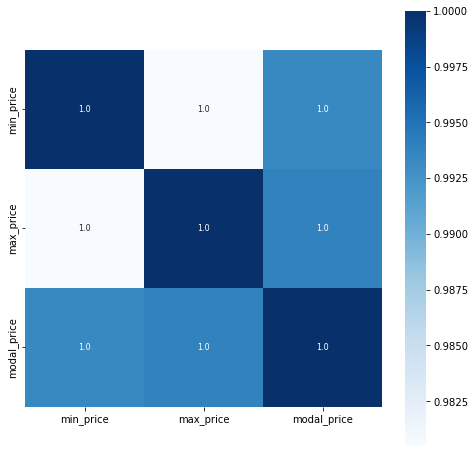

In [27]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [43]:
#Normalize labels
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
agri_data['commodity']=le.fit_transform(agri_data['commodity'])
agri_data['variety']=le.fit_transform(agri_data['variety'])
agri_data.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Gujarat,Amreli,Damnagar,12,14,18/01/2021,1400,1600,1500
1,Gujarat,Amreli,Damnagar,16,62,18/01/2021,1000,1200,1100
2,Gujarat,Amreli,Damnagar,17,20,18/01/2021,200,400,300
3,Gujarat,Amreli,Damnagar,21,23,18/01/2021,400,600,500
4,Gujarat,Amreli,Damnagar,26,28,18/01/2021,300,500,400


***Storing vector and values seperately***

In [44]:
from sklearn.metrics import r2_score
x=agri_data.iloc[:,[3,4,6,7]]
y=agri_data['modal_price']
print(x)
print(y)

     commodity  variety  min_price  max_price
0           12       14       1400       1600
1           16       62       1000       1200
2           17       20        200        400
3           21       23        400        600
4           26       28        300        500
..         ...      ...        ...        ...
214         57       48       1180       1250
215         60       27       2550       2650
216         66       82        900       1200
217         69       85       1700       2300
218         70       79       1900       2100

[219 rows x 4 columns]
0      1500
1      1100
2       300
3       500
4       400
       ... 
214    1200
215    2600
216    1000
217    2000
218    2000
Name: modal_price, Length: 219, dtype: int64


***Splitting Training and Test Data***

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y,train_size=0.80,  test_size = 0.20, random_state = 1)

**Model Training**

1. linear regression

In [31]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_predict=lr.predict(X_test)
acc1=r2_score(y_predict,y_test)
print(acc1)

0.9973441365735412


2. Random Forest

In [32]:
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
y_predict1=rfr.predict(X_test)
acc2=rfr.score(X_test,y_test)
acc2

0.995256447796064

3. Decision Tree

In [33]:
from sklearn import tree
dtr=tree.DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_predict2=dtr.predict(X_test)
acc3=r2_score(y_predict2,y_test)
acc3

0.9942879314718673

***Model Evaluation***
1. Linear Regression

In [34]:
test_vector=np.reshape(np.asarray([1,5,3100.0,3000.0]),(1,4))
p=int(lr.predict(test_vector)[0])
p

/Users/shreshikanayani/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


3031

2. Random Forest

In [35]:
test_vector=np.reshape(np.asarray([1,5,3100.0,3000.0]),(1,4))
q=int(rfr.predict(test_vector)[0])
q

/Users/shreshikanayani/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


2846

3. Decision Tree

In [36]:
test_vector=np.reshape(np.asarray([1,5,3100.0,3000.0]),(1,4))
r=int(dtr.predict(test_vector)[0])
r

/Users/shreshikanayani/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


2900

***Visualize the actual and predicted prices***

1. Linear Regression

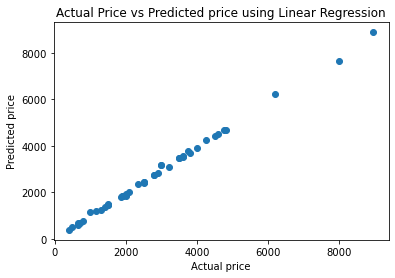

In [37]:
plt.scatter(y_test,y_predict)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual Price vs Predicted price using Linear Regression')
plt.show()

2.Random Forest

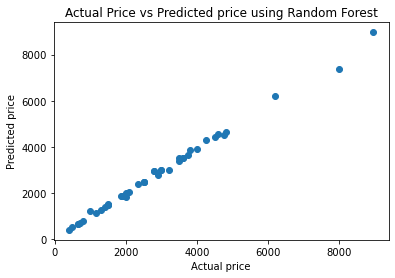

In [45]:
plt.scatter(y_test,y_predict1)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual Price vs Predicted price using Random Forest')
plt.show()

3. Decision Tree

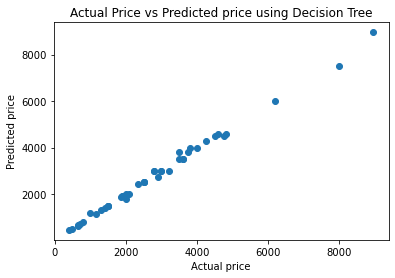

In [46]:
plt.scatter(y_test,y_predict2)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual Price vs Predicted price using Decision Tree')
plt.show()

In [ ]:
#saving model to disc
pickle.dump(lr,open('lrmodel.pkl','wb'))

In [ ]:
#Loading model to compare the results
model=pickle.load(open('lrmodel.pkl','rb'))

In [ ]:
pickle.dump(rfr,open('rfrmodel.pkl','wb'))

In [ ]:
model1=pickle.load(open('rfrmodel.pkl','rb'))

In [ ]:
pickle.dump(dtr,open('dtrmodel.pkl','wb'))

In [ ]:
model2=pickle.load(open('dtrmodel.pkl','rb'))